# 시계열 분석

### 정상성
- 평균이 일정한 경우 : 모든 시점에 대해 일정한 평균 / 차분(현 시점 자료에서 전 시점 자료를 빼는 것)을 통해 정상화
- 분산이 일정한 경우 : 분산이 시점에 의존하지 않고 일정 / 변환을 통해 정상화
- 공분산도 단지 시차에만 의존하고 실제 특정 시점 t, s에는 의존하지 않는다.

### 정상 시게열의 특징
- 어떤 시점에서 평균과 분산 그리고 특정한 시차의 길이를 갖는 자기공분산을 측정하더라도 동일한 값을 갖는다.
- 정상 시계열은 그 평균값으로 회귀하려는 경향이 있으며 그 평균값 주변에서의 변동은 대부분 일정하다.
- 정상 시계열이 아닌 경우 특정 기간의 시계열 자료로부터 얻은 정보를 다른 시기로 일반화 할 수 없다.



### 분석 방법
#### 자료형태
1. 일변량 시계열 분석
- 하나의 변수에 관심을 갖는 시계열 분석
2. 다중 시계열 분석
- 여러개의 시간에 따른 변수들을 활용


### 이동평균법
- 일정기간별 이동평균을 계산하고 추세를 파악하여 예측하는 방법
- 추세변동과 순환변동만 가진 시계열로 변환

### 지수평활법
- 모든 시계열 자료를 사용하여 평균을 구하고 최근 시계열에 더 많은 가중치를 부여하여 미래 예측
- 단기간에 발생하는 불규칙변동을 평활
- 자료의 수가 많고 안정된 패턴을 보이는 경우 예측 품질이 높음
- 지수평활계수는 과거로 갈수록 지속적으로 감소
- 중기예측 이상에 주로 사용

***

* AR(Auto-Regressive) 모형 = 자기회귀로 이전 관측치의 오차항이 이후 관측치에 영향을 준다.
* I(Integrated) = 누적을 의미
* MA(Moving Average) 모형 = 이동평균으로 관측값이 이전의 연속적인 오차항의 영향을 받는다.

* ARMA(Auto-Regressive Moving Average) 모형 = AR + MA
* ARIMA(p, d, q) = ARMA에서 비정상성을 제거

***
- AR(p) = ARIMA(p, 0, 0)
- MA(q) = ARIMA(0, 0, q)
- ARMA(p, q) = ARIMA(p, 0, q)
***


ARIMA 모수는 크게 3가지가 있다. AR모형의 Lag를 의미하는 p와 MA모형의 Lag를 의미하는 q 그리고 차분 횟수를 의미하는 d가 그것이다.

통상적으로 p + q < 2 & p * q = 0 인 값들을 자주 사용한다.
***

#### ACF(자기상관함수) : Lag에 따른 관측치들 사이의 관련성을 측정
#### PACF(부분자기함수) : k 이외의 모든 다른 시점 관측치의 영향력을 배제하고 두 관측치의 관련성을 측정
***
시계열 데이터가 AR의 특성을 띄는 경우 ACF는 천천히 감소하고 PACF는 처음 시차를 제외하고 급격히 감소한다.

반대로 MA의 특성을 띄는 경우 ACF는 급격히 감소하고 PACF는 천천히 감소한다.

In [107]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline

In [205]:
data = pd.read_csv('Unknown.txt')

In [109]:
data.head()

,Timestamp,market-price
0,2020-03-26 00:00:00,6698.46
1,2020-03-27 00:00:00,6763.75
2,2020-03-28 00:00:00,6369.09
3,2020-03-29 00:00:00,6260.95
4,2020-03-30 00:00:00,5885.41


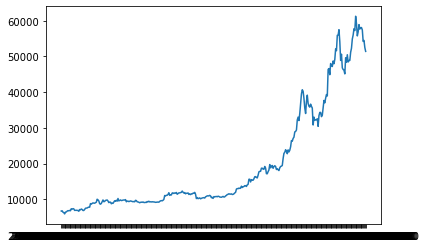

In [110]:
plt.plot(data['Timestamp'], data['market-price'])
plt.show()

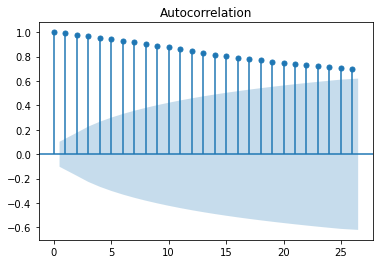

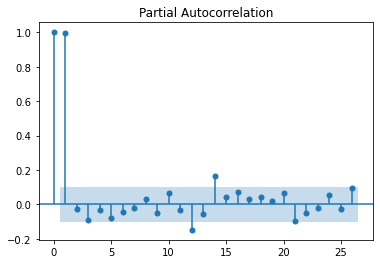

In [111]:
plot_acf(data['market-price'])
plot_pacf(data['market-price'])
plt.show()

ACF는 천천히 감소하며 PACF는 빠르게 감소하기 때문에 AR모형이라고 볼 수 있다.

PACF는 Lag2에서 절단점을 가지므로 ARMA(1, 0)으로 볼 수 있다.

In [112]:
diff_1 = data['market-price'].diff(periods = 1).iloc[1:]

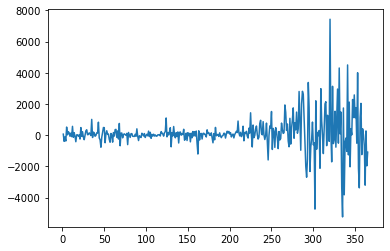

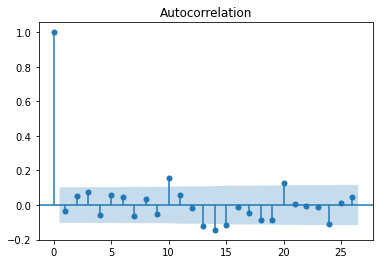

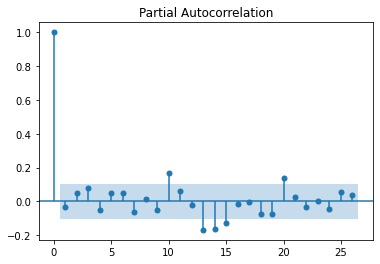

In [113]:
plt.plot(diff_1)
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

***
### ADF검정

statsmodels 패키지는 [`statsmodels.tsa.adfuller`](http://statsmodels.sourceforge.net/stable/generated/statsmodels.tsa.stattools.adfuller.html) 라는 ADF 검정 함수를 제공한다. 

입력 인수와 반환값은 다음과 같다.

* 입력 인수

  * x : 시계열 자료
  * maxlag : ADF 검정에 사용할 시차의 수. 디폴트 12*(nobs/100)^{1/4}
  * regression : 검정 사용할 모형. 
    * 'nc': 결정론적 추세 없음. DF 검정
    * 'c': 상수항만 사용
    * 'ct': 상수항과 1차 추세 사용
    * 'ctt': 상수항과 1차 추세, 2차 추세 사용
  *  autolag : 검정 AR 모형의 차수를 자동 결정하는 알고리즘 {‘AIC’, ‘BIC’, ‘t-stat’, None}


* 반환값

  * adf : 검정 통계량
  * pvalue : MacKinnon(1994) 방식을 사용한 p-value 추정치
  * usedlag : 사용된 시차의 수
  * nobs : 분석에 자료의 수
  * critical values : 1%, 5%, 10% 수준에 해당되는 검정 통계량의 값
***
- p <0.05 인 경우; 데이터가 고정되어 있습니다.
- p> 0.05 인 경우; 데이터가 고정되어 있지 않습니다. p 값이 클수록 특정 추세 (다양한 평균) 또는 계절성이 있음을 나타낼 수 있습니다.
***
### ARIMA

#### 정상성 시계열에 사용
#### 비정상은 차분을 통해 정상성 만족
#### 1차 차분을 먼저 해본다.
는 정상시계열에 한해 사용된다. acf,pacf를 통해 정상성을 확인할 수도 있지만, adf검정을 통해 확인할 수 있다.(통계적 방법)

In [114]:
from statsmodels.tsa.stattools import adfuller

y = data['market-price']
y1dif = data['market-price'].diff(periods = 1).dropna()

result = adfuller(y)
print("원 데이터의 ADF 값 : {}".format(result[0]))
print('원 데이터의 P-value : {}\n'.format(result[1]))

result1 = adfuller(y1dif)
print("1차 차분 데이터의 ADF 값 : {}".format(result1[0]))
print('1차 차분 데이터의 P-value : {}'.format(result1[1]))

원 데이터의 ADF 값 : 1.5826765356055907
원 데이터의 P-value : 0.997804661936354

1차 차분 데이터의 ADF 값 : -6.029416130670418
1차 차분 데이터의 P-value : 1.429831459792066e-07


1차 차분 후 유의확률이 0에 근사하므로 차분을 하면 정상성이 있다고 볼 수 있다.이로 인해 차분의 차수(d)는 1이다.
***
### KPSS 안정성 테스트

#### 시계열이 평균 or 선형 추세 주변에 고정되어 있는지 또는 단위 루트로 인해 고정되지 않은지 확인
- 귀무가설 : 시계열이 안정적이다
- 대립가설 : 시계열이 안정적이지 않습니다.

In [115]:
from statsmodels.tsa.stattools import kpss

In [116]:
statistic, p_value, n_lags, critial_values = kpss(data['market-price'])

print("KPSS Statistic : {}".format(statistic))
print("P-value : {}".format(p_value))
print("num_lags : {}".format(n_lags))
print("Critial_values : {}".format(critial_values))

KPSS Statistic : 1.645128336440664
P-value : 0.01
num_lags : 17
Critial_values : {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [117]:
statistic, p_value, n_lags, critial_values = kpss(data['market-price'].diff(periods = 1).dropna())

print("KPSS Statistic : {}".format(statistic))
print("P-value : {}".format(p_value))
print("num_lags : {}".format(n_lags))
print("Critial_values : {}".format(critial_values))

KPSS Statistic : 0.3262937964790296
P-value : 0.1
num_lags : 17
Critial_values : {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


검정통계값이 더 작아졌으므로 1차 차분을 진행한다.

In [118]:
model = ARIMA(data['market-price'], order = (1,1,0))
model_fit = model.fit(trend = 'nc',full_output = True, disp = True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:         D.market-price   No. Observations:                  365
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -3071.088
Method:                       css-mle   S.D. of innovations           1091.166
Date:                Sat, 27 Mar 2021   AIC                           6146.177
Time:                        01:17:59   BIC                           6153.977
Sample:                             1   HQIC                          6149.277
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
ar.L1.D.market-price    -0.0216      0.052     -0.412      0.680      -0.124       0.081
                                    Roots                                    
                  Real 

In [119]:
print(stats.normaltest(model_fit.resid))

NormaltestResult(statistic=100.0612533370826, pvalue=1.8705740779835475e-22)


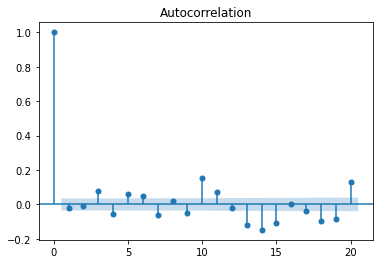

In [96]:
resid = model_fit.resid
sig_val = 0.5
fig = sm.graphics.tsa.plot_acf(resid,lags = 20, alpha=sig_val)

In [97]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(data['market-price'], order=(2,1,0))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:         D.market-price   No. Observations:                  365
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -3068.203
Method:                       css-mle   S.D. of innovations           1082.567
Date:                Sat, 27 Mar 2021   AIC                           6144.407
Time:                        01:14:12   BIC                           6160.006
Sample:                             1   HQIC                          6150.606
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  122.0819     57.577      2.120      0.034       9.234     234.930
ar.L1.D.market-price    -0.0329      0.052     -0.630      0.529      -0.135       0.070
ar.L2.D.mark

In [98]:
def my_auto_arima(data, order,sort = 'AIC'):
    order_list = []
    aic_list = []
    bic_lsit = []
    for p in range(order[0]):
        for d in range(order[1]):
            for q in range(order[2]) :
                model = ARIMA(data, order=(p,d,q))
                try:
                    model_fit = model.fit()
                    c_order = f'p{p} d{d} q{q}'
                    aic = model_fit.aic
                    bic = model_fit.bic
                    order_list.append(c_order)
                    aic_list.append(aic)
                    bic_list.append(bic)
                except:
                     pass
    result_df = pd.DataFrame(list(zip(order_list, aic_list)),columns=['order','AIC'])
    result_df.sort_values(sort, inplace=True)
    return result_df

In [99]:
my_auto_arima(data['market-price'],[3,3,3])

,order,AIC
6,p0 d2 q1,6131.171999
14,p1 d2 q2,6132.558190
13,p1 d2 q1,6132.581245
7,p0 d2 q2,6132.631083
20,p2 d2 q1,6133.914724
18,p2 d1 q2,6134.078188
21,p2 d2 q2,6135.111270
2,p0 d1 q0,6141.718230
9,p1 d1 q0,6143.272524
3,p0 d1 q1,6143.314162


In [100]:
model = ARIMA(data['market-price'], order=(0,2,1))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.market-price   No. Observations:                  364
Model:                 ARIMA(0, 2, 1)   Log Likelihood               -3062.586
Method:                       css-mle   S.D. of innovations           1082.096
Date:                Sat, 27 Mar 2021   AIC                           6131.172
Time:                        01:14:13   BIC                           6142.863
Sample:                             2   HQIC                          6135.819
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.8732      0.538      1.624      0.104      -0.180       1.927
ma.L1.D2.market-price    -1.0000      0.008   -126.242      0.000      -1.016      -0.984
        

                             ARIMA Model Results                              
Dep. Variable:        D2.market-price   No. Observations:                  364
Model:                 ARIMA(0, 2, 1)   Log Likelihood               -3062.586
Method:                       css-mle   S.D. of innovations           1082.096
Date:                Sat, 27 Mar 2021   AIC                           6131.172
Time:                        01:14:13   BIC                           6142.863
Sample:                             2   HQIC                          6135.819
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.8732      0.538      1.624      0.104      -0.180       1.927
ma.L1.D2.market-price    -1.0000      0.008   -126.242      0.000      -1.016      -0.984
        

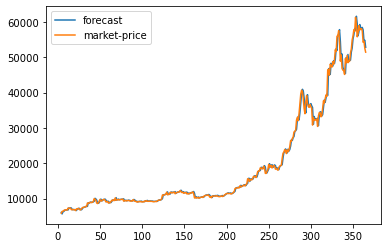

In [101]:
model = ARIMA(data['market-price'], (0,2,1))
model_fit = model.fit()
print(model_fit.summary())
model_fit.plot_predict()
plt.show()

In [161]:
test = pd.DataFrame(pd.to_datetime([x for x in range(127)], unit='d',
               origin=pd.Timestamp('2021-03-27')),columns = ['day'])

In [162]:
test = test.set_index('day')

In [163]:
prediction = model_fit.forecast(len(test))

In [164]:
test['price'] = prediction[0]

In [166]:
from sklearn.metrics import r2_score

In [167]:
predicted_value = prediction[0]
predicted_ub = prediction[2][:,1]
predicted_lb = prediction[2][:,0]
predict_index = list(test.index)

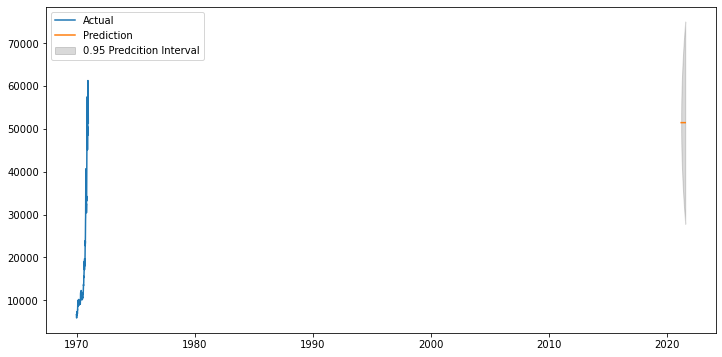

In [168]:
fig, ax = plt.subplots(figsize=(12,6))
plt.plot(data['market-price'],label = 'Actual')
ax.plot(predict_index, predicted_value, label = 'Prediction');
ax.fill_between(predict_index, predicted_lb, predicted_ub, color = 'k', alpha = .15, label = '0.95 Predcition Interval')
ax.legend(loc='upper left');
plt.show()

# Seasonal ARIMA 모형

Seasonal ARIMA 모형은 줄여서 SARIMA라고 하기도 한다. 단순 SARIMA 모형은 각 계절에 따른 독립적인 ARIMA 모형이 합쳐져 있는 모형이다. 기존 ARIMA(p,d,q) 모형에 계절성 주기를 나타내는 차수 s가 추가적으로 필요하기 때문에 SARIMA(P,D,Q,s) 로 표기한다.

s의 값은 월별 계절성을 나타낼 때는 $s=12$가 되고 분기별 계절성을 나타낼 때는 $s=4$가 된다.

예를 들어 각 월의 시계열 자료 값이 현재의 백색 잡음 이외에 작년 동월의 백색 잡음에도 영향을 받는다면 다음과 같은 단순 SARIMA(0,0,1,12) 모형이 된다. 

In [173]:
url = 'https://sites.google.com/site/datasciencehiro/datasets/AirPassengers.csv'
df = pd.read_csv(url, index_col='Date', parse_dates=True)
df.head()

,Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


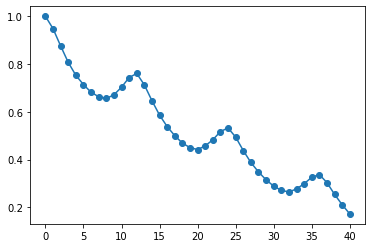

In [187]:
acf = sm.tsa.stattools.acf(df,nlags=40)
plt.plot(acf,marker = 'o')
plt.show()

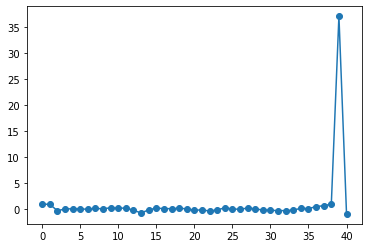

In [189]:
pacf = sm.tsa.stattools.pacf(df,nlags=40)
plt.plot(pacf,marker = 'o')
plt.show()

In [175]:
SARIMAX_model = sm.tsa.SARIMAX(df, order=(3,1,2), seasonal_order=(1,1,1,12)).fit(maxiter=200)

In [176]:
print(SARIMAX_model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                           Passengers   No. Observations:                  144
Model:             SARIMAX(3, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -502.966
Date:                              Sat, 27 Mar 2021   AIC                           1021.931
Time:                                      01:37:05   BIC                           1044.933
Sample:                                  01-01-1949   HQIC                          1031.278
                                       - 12-01-1960                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6985      1.567      0.446      0.656      -2.373       3.770
ar.L2          0.19

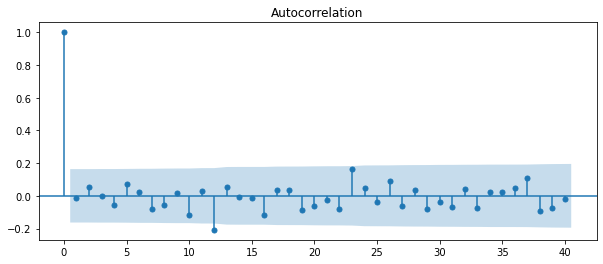

In [177]:
resid = SARIMAX_model.resid
fig,ax = plt.subplots(figsize=(10,4))
fig2 = sm.graphics.tsa.plot_acf(resid,lags = 40, alpha=0.05,ax = ax)

In [178]:
pred = SARIMAX_model.predict(start='1960-01-01', end='1962-12-01')

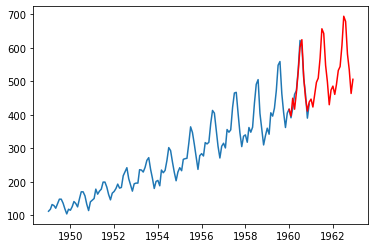

In [179]:
plt.plot(df)
plt.plot(pred,'r')

In [180]:
p = range(0,5)
d = range(0,2)
q = range(0,5)
pdq = list(itertools.product(p,d,q))

In [184]:
aic = []
for i in pdq:
    try:
        model = ARIMA(df.Passengers, order=(i))
        model_fit = model.fit()
        print(f'ARIMA: {i} >> AIC : {round(model_fit.aic,2)}')
        aic.append(round(model_fit.aic,2))
    except:
        continue

ARIMA: (0, 0, 0) >> AIC : 1790.37
ARIMA: (0, 0, 1) >> AIC : 1618.86
ARIMA: (0, 1, 0) >> AIC : 1415.28
ARIMA: (0, 1, 1) >> AIC : 1398.83
ARIMA: (0, 1, 2) >> AIC : 1398.39
ARIMA: (0, 1, 3) >> AIC : 1381.66
ARIMA: (0, 1, 4) >> AIC : 1357.31
ARIMA: (1, 0, 0) >> AIC : 1428.18
ARIMA: (1, 0, 1) >> AIC : 1409.75
ARIMA: (1, 0, 2) >> AIC : 1411.05
ARIMA: (1, 0, 3) >> AIC : 1420.29
ARIMA: (1, 0, 4) >> AIC : 2441.7
ARIMA: (1, 1, 0) >> AIC : 1403.47
ARIMA: (1, 1, 1) >> AIC : 1402.15
ARIMA: (1, 1, 2) >> AIC : 1371.82
ARIMA: (1, 1, 3) >> AIC : 1373.08
ARIMA: (1, 1, 4) >> AIC : 1359.17
ARIMA: (2, 0, 0) >> AIC : 1413.64
ARIMA: (2, 0, 1) >> AIC : 1408.25
ARIMA: (2, 0, 2) >> AIC : 1461.38
ARIMA: (2, 0, 3) >> AIC : 1442.08
ARIMA: (2, 0, 4) >> AIC : 2449.27
ARIMA: (2, 1, 0) >> AIC : 1397.98
ARIMA: (2, 1, 1) >> AIC : 1361.7
ARIMA: (2, 1, 2) >> AIC : 1344.04
ARIMA: (2, 1, 3) >> AIC : 1343.28
ARIMA: (2, 1, 4) >> AIC : 1338.58
ARIMA: (3, 0, 0) >> AIC : 1410.34
ARIMA: (3, 0, 1) >> AIC : 1395.27
ARIMA: (3, 0, 2)

In [185]:
optimal = [(pdq[i], j) for i, j in enumerate(aic) if j== min(aic)]

In [186]:
optimal

[((4, 1, 1), 1332.95)]

### 시계열 분해


In [193]:
dates = pd.date_range('2020-01-01', periods=48, freq='M')

In [197]:
timestamp = np.arange(len(dates))
trend_factor = timestamp*1.1
cycle_factor = 10*np.sin(np.linspace(0, 3.14*2, 48))
seasonal_factor = 7*np.sin(np.linspace(0, 3.14*8, 48))
np.random.seed(2004)
irregular_factor = 2*np.random.randn(len(dates))
df = pd.DataFrame({'timeseries': trend_factor + cycle_factor + seasonal_factor + irregular_factor,
                   'trend': trend_factor, 
                   'cycle': cycle_factor, 
                   'trend_cycle': trend_factor + cycle_factor,
                   'seasonal': seasonal_factor, 
                   'irregular': irregular_factor},
                   index=dates)

In [198]:
df.head()

,timeseries,trend,cycle,trend_cycle,seasonal,irregular
2020-01-31,2.596119,0.0,0.000000,0.000000,0.000000,2.596119
2020-02-29,6.746160,1.1,1.332198,2.432198,3.565684,0.748278
2020-03-31,8.112100,2.2,2.640647,4.840647,6.136825,-2.865371
2020-04-30,8.255941,3.3,3.902021,7.202021,6.996279,-5.942358
2020-05-31,16.889655,4.4,5.093834,9.493834,5.904327,1.491495


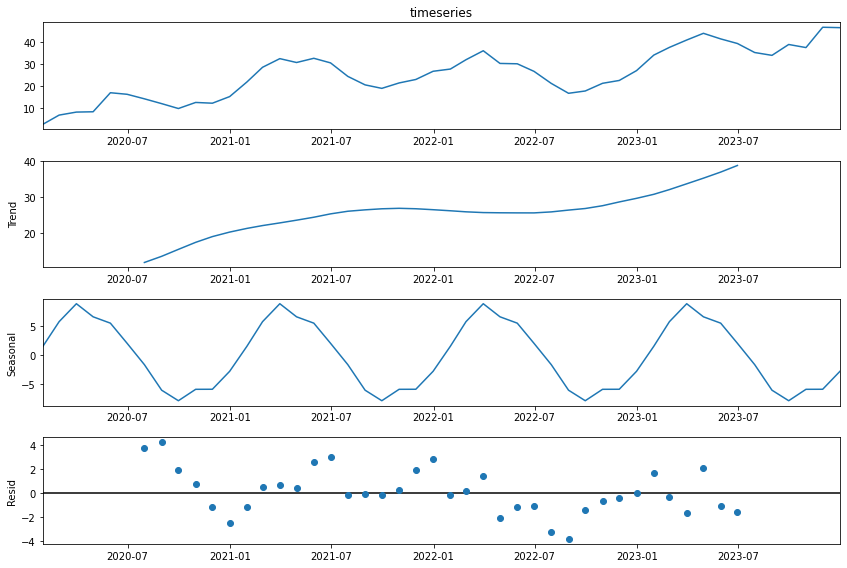

In [200]:
from statsmodels.tsa.seasonal import seasonal_decompose
ts = df.timeseries
result = seasonal_decompose(ts, model='additive')
plt.rcParams['figure.figsize'] = [12, 8]
result.plot()
plt.show()

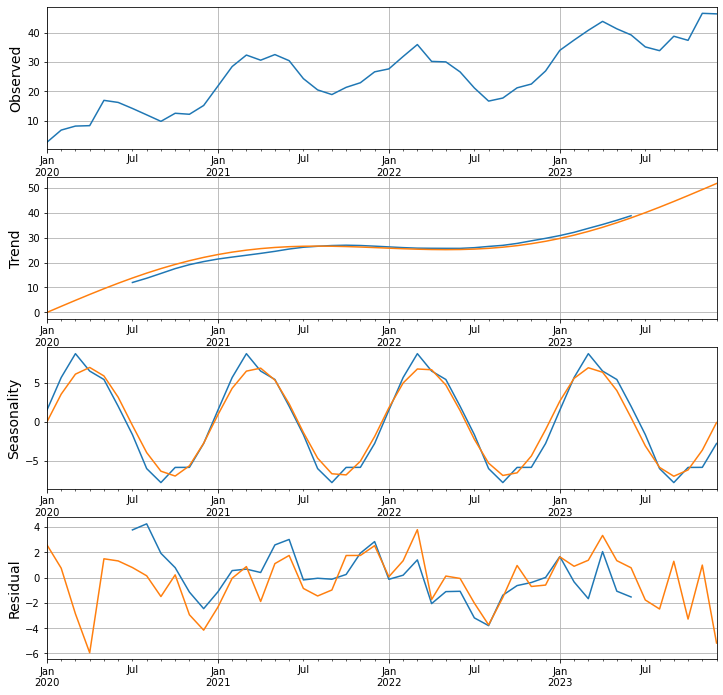

In [201]:
# ground truth & timeseries decompostion all together

# -- observed data
plt.figure(figsize=(12, 12))
plt.subplot(4,1, 1)
result.observed.plot()
plt.grid(True)
plt.ylabel('Observed', fontsize=14)

# -- trend & cycle factor
plt.subplot(4, 1, 2)
result.trend.plot()        # from timeseries decomposition
df.trend_cycle.plot()     # groud truth
plt.grid(True)
plt.ylabel('Trend', fontsize=14)

# -- seasonal factor
plt.subplot(4, 1, 3)
result.seasonal.plot()  # from timeseries decomposition
df.seasonal.plot()        # groud truth
plt.grid(True)
plt.ylabel('Seasonality', fontsize=14)

# -- irregular factor (noise)
plt.subplot(4, 1, 4)
result.resid.plot()
df.irregular.plot()
plt.grid(True)
plt.ylabel('Residual', fontsize=14)
plt.show()

In [203]:
result.observed.head()

2020-01-31     2.596119
2020-02-29     6.746160
2020-03-31     8.112100
2020-04-30     8.255941
2020-05-31    16.889655
Freq: M, Name: timeseries, dtype: float64

In [204]:
result.trend.head()

2020-01-31   NaN
2020-02-29   NaN
2020-03-31   NaN
2020-04-30   NaN
2020-05-31   NaN
Freq: M, Name: trend, dtype: float64

## 적용

In [214]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model='additive') # 시계열 데이터가 곱연산으로 진행되면 additive -> multiplicative
result.plot()
plt.show()

In [210]:
model = ARIMA(data['market-price'], order=(2, 1, 0)) # p: pacf의 절단 위치, d: 차분 횟수, q: acf의 절단 위치
model_fit = model.fit(trend='c',full_output=True, disp=1) # constant 유효x: c -> nc

                             ARIMA Model Results                              
Dep. Variable:         D.market-price   No. Observations:                  365
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -3068.203
Method:                       css-mle   S.D. of innovations           1082.567
Date:                Sat, 27 Mar 2021   AIC                           6144.407
Time:                        01:59:58   BIC                           6160.006
Sample:                             1   HQIC                          6150.606
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  122.0819     57.577      2.120      0.034       9.234     234.930
ar.L1.D.market-price    -0.0329      0.052     -0.630      0.529      -0.135       0.070
ar.L2.D.mark

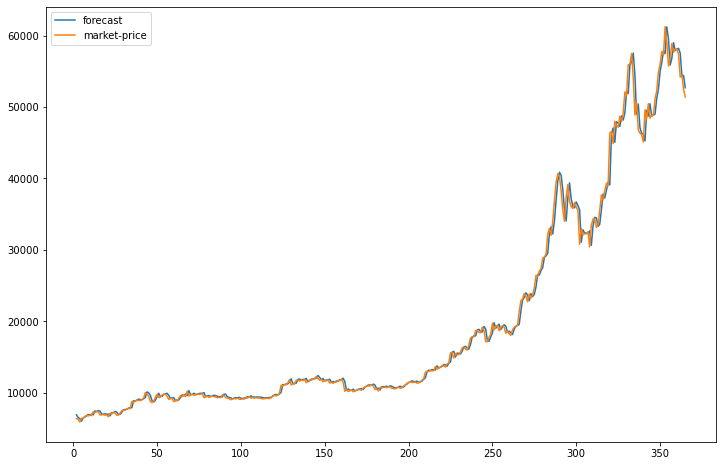

In [211]:
print(model_fit.summary())
model_fit.plot_predict()
fore = model_fit.forecast(steps = 1)

In [213]:
fore # 예측값, 표준편차, 하한, 상한

(array([51475.73130452]),
 array([1082.56670797]),
 array([[49353.93954604, 53597.52306299]]))